In [83]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.datasets import fetch_california_housing, load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import mlrose
import time
from timeit import default_timer as timer

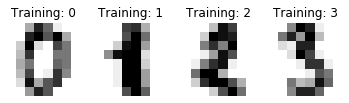

In [84]:
#load in the data
digits = load_digits()

#show ample digits
#taken from: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [85]:
#no need to scale this data
X = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print(X[1].reshape(8,8))

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


In [86]:
clf = MLPClassifier(solver='lbfgs', random_state = 2, verbose = 2)

layer_list = []
for i in range(4,10):
    layer_list.append((i,))
    for j in range(4,10):
        layer_list.append((i,j))
        for k in range(4,10):
            layer_list.append((i,j,k))

gs = GridSearchCV(clf, cv=5, iid=False, param_grid={
    'hidden_layer_sizes': layer_list
    })

gs.fit(X, y)
print('im done')

im done


In [88]:
print (gs.cv_results_ )

{'mean_fit_time': array([0.21119576, 0.29010081, 0.02317705, 0.33150716, 0.28072414,
       0.32285504, 0.33776269, 0.30833726, 0.24062243, 0.22056932,
       0.2677989 , 0.28046689, 0.23071947, 0.27687397, 0.28629193,
       0.10468512, 0.27004642, 0.28092484, 0.27832799, 0.03236971,
       0.28338065, 0.2791862 , 0.23673382, 0.27310686, 0.03655214,
       0.28029947, 0.17676506, 0.08027544, 0.29358149, 0.05904384,
       0.01215591, 0.2331872 , 0.16044645, 0.24380836, 0.28646951,
       0.28119507, 0.20929632, 0.01224713, 0.2131319 , 0.3012527 ,
       0.24274459, 0.26717272, 0.29866042, 0.16474724, 0.23775177,
       0.16959481, 0.27640991, 0.16274662, 0.20313087, 0.13816156,
       0.28626738, 0.01074791, 0.17628145, 0.01104617, 0.17449665,
       0.01588225, 0.12831721, 0.01622596, 0.19195743, 0.14015117,
       0.06492357, 0.17175565, 0.30377307, 0.29358025, 0.25600171,
       0.19914484, 0.2509346 , 0.2813499 , 0.19713602, 0.02578082,
       0.29563627, 0.29554944, 0.1019958 , 0

In [89]:
data_summary = pd.DataFrame(gs.cv_results_)[['param_hidden_layer_sizes','mean_test_score','mean_fit_time','rank_test_score']]
display(data_summary.sort_values('rank_test_score').head(20))

,param_hidden_layer_sizes,mean_test_score,mean_fit_time,rank_test_score
233,"(9, 6, 6)",0.885995,0.314639,1
213,"(8, 9, 8)",0.882624,0.318159,2
250,"(9, 8, 9)",0.854868,0.353578,3
229,"(9, 5, 9)",0.852002,0.341285,4
207,"(8, 8, 9)",0.851441,0.336406,5
204,"(8, 8, 6)",0.849374,0.373785,6
165,"(7, 9)",0.848537,0.279600,7
205,"(8, 8, 7)",0.847768,0.347465,8
206,"(8, 8, 8)",0.844822,0.326771,9
212,"(8, 9, 7)",0.838407,0.337714,10


In [52]:
display(x_train)
display(y_train_hot)

array([[ 0.,  0., 10., ..., 16.,  8.,  0.],
       [ 0.,  1., 12., ...,  9.,  4.,  0.],
       [ 0.,  4., 16., ..., 16.,  8.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 15.,  4.,  0.],
       [ 0.,  0.,  6., ..., 16., 16., 12.],
       [ 0.,  3., 14., ...,  0.,  0.,  0.]])

matrix([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
one_hot = OneHotEncoder()
y_train_hot = one_hot.fit_transform(y_train.reshape(-1,1)).todense()
y_test_hot = one_hot.fit_transform(y_test.reshape(-1,1)).todense()
hidden_nodes = [9,6,6]

In [81]:
gd_list = []
max_iters = [100,500,1000,10000]
print("gd started at: {}".format(time.ctime()))
for iters in max_iters: 
    t_start = timer()
    nn_model = mlrose.NeuralNetwork(hidden_nodes=hidden_nodes,
                                   algorithm='gradient_descent',
                                   max_iters = iters,
                                    random_state = 3)
    nn_model.fit(x_train, y_train_hot)
    y_test_pred = nn_model.predict(x_test)
    score = metrics.accuracy_score(y_test_hot, y_test_pred)
    t_end = timer()
    gd_list.append(['gd',iters,t_end-t_start,score])
print("gd ended at: {}".format(time.ctime()))
display(gd_list)

gd started at: Sun Oct 13 21:25:03 2019
gd ended at: Sun Oct 13 21:26:21 2019


[['gd', 100, 0.6939555999997538, 0.08888888888888889],
 ['gd', 500, 3.5576576000021305, 0.08888888888888889],
 ['gd', 1000, 7.074385899992194, 0.08888888888888889],
 ['gd', 10000, 66.42403920000652, 0.08888888888888889]]

In [80]:
rhc_list = []
max_iters = [500000]
print("rhc started at: {}".format(time.ctime()))
for iters in max_iters: 
    t_start = timer()
    nn_model = mlrose.NeuralNetwork(hidden_nodes=hidden_nodes,
                                   algorithm='random_hill_climb',
                                   max_iters = iters,
                                    random_state = 2)
    nn_model.fit(x_train, y_train_hot)
    y_test_pred = nn_model.predict(x_test)
    score = metrics.accuracy_score(y_test_hot, y_test_pred)
    t_end = timer()
    rhc_list.append(['rhc',iters,t_end-t_start,score])
print("rhc ended at: {}".format(time.ctime()))
display(rhc_list)

rhc started at: Sun Oct 13 20:54:12 2019
rhc ended at: Sun Oct 13 21:22:11 2019


[['rhc', 500000, 1679.2625025000016, 0.55]]

In [77]:
sa_list = []
max_iters = [100,500,1000,10000,50000,100000,250000,500000]
print("sa started at: {}".format(time.ctime()))
for iters in max_iters: 
    t_start = timer()
    nn_model = mlrose.NeuralNetwork(hidden_nodes=hidden_nodes,
                                   algorithm='simulated_annealing',
                                   max_iters = iters,
                                    random_state = 2)
    nn_model.fit(x_train, y_train_hot)
    y_test_pred = nn_model.predict(x_test)
    score = metrics.accuracy_score(y_test_hot, y_test_pred)
    t_end = timer()
    sa_list.append(['sa',iters,t_end-t_start,score])
print("sa ended at: {}".format(time.ctime()))
display(sa_list)


sa started at: Sun Oct 13 12:33:22 2019
sa ended at: Sun Oct 13 13:57:46 2019


[['sa', 100, 0.6225819999963278, 0.10277777777777777],
 ['sa', 500, 3.444372399986605, 0.06111111111111111],
 ['sa', 1000, 6.512301300012041, 0.125],
 ['sa', 10000, 55.62880529998802, 0.39444444444444443],
 ['sa', 50000, 258.1293552999996, 0.5083333333333333],
 ['sa', 100000, 501.00512020000315, 0.6138888888888889],
 ['sa', 250000, 1429.0439156000066, 0.7416666666666667],
 ['sa', 500000, 2810.1020749000018, 0.8111111111111111]]

In [79]:
ga_list = []
max_iters = [100,1000,10000]
print("sa started at: {}".format(time.ctime()))
for iters in max_iters: 
    t_start = timer()
    nn_model = mlrose.NeuralNetwork(hidden_nodes=hidden_nodes,
                                   algorithm='genetic_alg',
                                   max_iters = iters,
                                    random_state = 2)
    nn_model.fit(x_train, y_train_hot)
    y_test_pred = nn_model.predict(x_test)
    score = metrics.accuracy_score(y_test_hot, y_test_pred)
    t_end = timer()
    ga_list.append(['ga',iters,t_end-t_start,score])
print("ga ended at: {}".format(time.ctime()))
display(ga_list)

sa started at: Sun Oct 13 14:41:31 2019
ga ended at: Sun Oct 13 17:12:45 2019


[['ga', 100, 90.23694410000462, 0.08888888888888889],
 ['ga', 1000, 871.9284616999939, 0.16666666666666666],
 ['ga', 10000, 8111.876126499992, 0.19166666666666668]]

In [ ]:
ga_list